In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs

In [38]:
#fpath = "/xtmp/Katherine.Turner/work/analysis_odiv230/atmos*ps.nc"
exp_path = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/"
file_path = "atmos/ts/daily/5yr/atmos*ps.nc"
fpath = exp_path+file_path

In [39]:
ds = xr.open_mfdataset(f"{fpath}", use_cftime=True)

In [40]:
ds

<xarray.Dataset>
Dimensions:     (time: 41975, bnds: 2, lat: 360, lon: 576)
Coordinates:
  * bnds        (bnds) float64 1.0 2.0
  * lat         (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon         (lon) float64 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
  * time        (time) object 0101-01-01 12:00:00 ... 0215-12-31 12:00:00
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(1825,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(1825,), meta=np.ndarray>
    lat_bnds    (time, lat, bnds) float64 dask.array<chunksize=(1825, 360, 2), meta=np.ndarray>
    lon_bnds    (time, lon, bnds) float64 dask.array<chunksize=(1825, 576, 2), meta=np.ndarray>
    ps          (time, lat, lon) float32 dask.array<chunksize=(1825, 360, 576), meta=np.ndarray>
    time_bnds   (time, bnds) object dask.array<chunksize=(1825, 2), meta=np.ndarray>
Attributes:
    filename:              atmos.01010101-01051231.ps.nc
    title:                 CM4_piControl_c192_OM4p25_v8
    associated_files:      area: 01050101.grid_spec.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  19.1
    git_hash:              c97c1f6afab0df3545ee82c337d51accc4205bc3
    creationtime:          Tue Dec 27 00:22:06 2022
    hostname:              pp054
    history:               fregrid --standard_dimension --input_mosaic C192_m...

In [4]:
slp_mean = ds.ps.mean(dim="time")*1e-2
slp_var = ds.ps.var(dim="time")*1e-4

In [5]:
slp_mean = slp_mean.load()
slp_var = slp_var.load()

In [6]:
# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

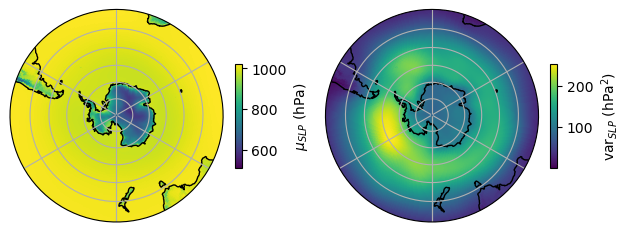

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})

axs.flatten()

slp_mean.plot(ax=axs[0], x="lon", y="lat",
             transform=ccrs.PlateCarree(),
             cbar_kwargs = {'label': '$\mu_{SLP}$ (hPa)',
                           'fraction': 0.03,
                           'aspect': 15,
                           'shrink': 0.7})
axs[0].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
axs[0].gridlines()
axs[0].set_boundary(circle, transform=axs[0].transAxes)
axs[0].coastlines()


axs[1].set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())
axs[1].gridlines()
axs[1].set_boundary(circle, transform=axs[1].transAxes)
axs[1].coastlines()
slp_var.plot(ax=axs[1], x='lon', y='lat',
            transform=ccrs.PlateCarree(),
            cbar_kwargs = {'label': 'var$_{SLP}$ (hPa$^2$)',
                          'fraction': 0.03,
                          'aspect': 15,
                          'shrink': 0.7})
plt.tight_layout()
plt.show()

In [29]:
# create seasonal means and variance
slp_seasonal_avg = ds.ps.groupby("time.season").mean(dim="time") * 1e-2
slp_seasonal_var = ds.ps.groupby("time.season").var(dim="time") * 1e-4

In [18]:
yr_seasons = ["DJF", "MAM", "JJA", "SON"]

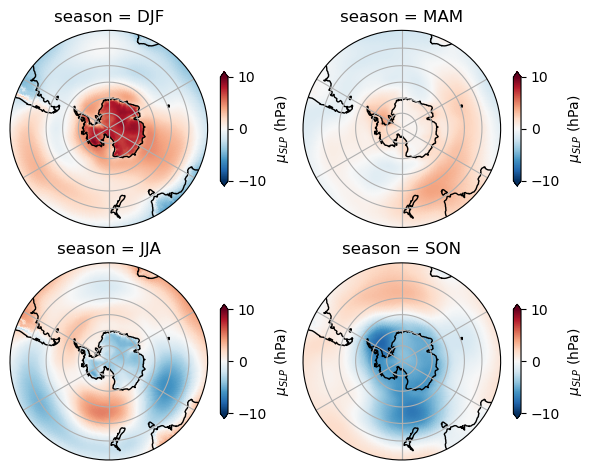

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})

axs = axs.flatten()

for i, sea in enumerate(yr_seasons):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines()
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
    (slp_seasonal_avg.sel(season=sea)-slp_mean).plot(ax=axs[i], x="lon", y="lat",
                                                     vmin=-10, vmax=10, extend="both",
                                                     cmap=plt.get_cmap("RdBu_r"),
                                                     transform=ccrs.PlateCarree(),
                                                     cbar_kwargs = {'label': '$\mu_{SLP}$ (hPa)',
                                                                    'fraction': 0.03,
                                                                    'aspect': 15,
                                                                    'shrink': 0.7})

plt.tight_layout()
plt.show()

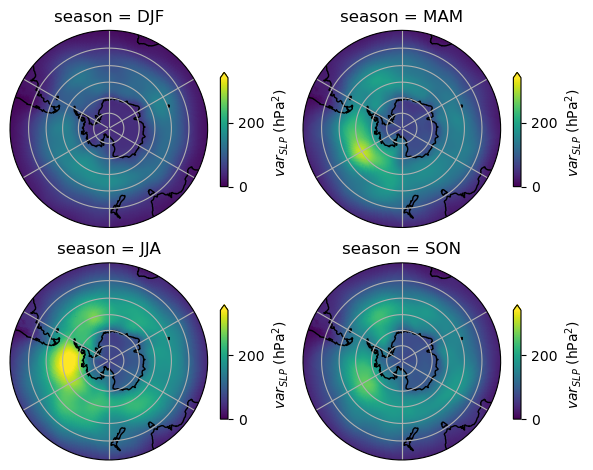

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=2,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})

axs = axs.flatten()

for i, sea in enumerate(yr_seasons):
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines()
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
    slp_seasonal_var.sel(season=sea).plot(ax=axs[i], x="lon", y="lat",
                                          vmin=0, vmax=340, extend="max",
                                          transform=ccrs.PlateCarree(),
                                          cbar_kwargs = {'label': '$var_{SLP}$ (hPa$^2$)',
                                                        'fraction': 0.03,
                                                        'aspect': 15,
                                                        'shrink': 0.7})

plt.tight_layout()
plt.show()